# mom6_bathy Notebook Gallery
## Applying an existing land fraction

In this notebook, we create a spherical grid with uniform resolution. We then implement a flat-bottom bathymetry. Finally, we apply a land fraction obtained from an already generated land dataset.

## 1. Import Modules

In [1]:
%%capture
import numpy as np
from mom6_bathy.grid import Grid
from mom6_bathy.topo import Topo

## 2. Create a horizontal MOM6 grid

Spherical grid. x coordinates interval= [0, 360] degrees. y coordinates interval = [-80,+80] degrees

In [2]:
# Instantiate a MOM6 grid instance
grid = Grid(
    nx         = 360,         # Number of grid points in x direction
    ny         = 160,          # Number of grid points in y direction
    lenx       = 360.0,       # grid length in x direction, e.g., 360.0 (degrees)
    leny       = 160,         # grid length in y direction
    cyclic_x   = True,      # reentrant, spherical domain
    ystart     = -80          # start/end 10 degrees above/below poles to avoid singularity 
)

## 3. Configure the bathymetry

In [3]:
# Instantiate a Topo object associated with the horizontal grid object (grid).
topo = Topo(grid, min_depth=10.0)

### *flat bottom bathymetry*

In [4]:
# Set the bathymetry to be a flat bottom with a depth of 2000m
topo.set_flat(D=2000.0)

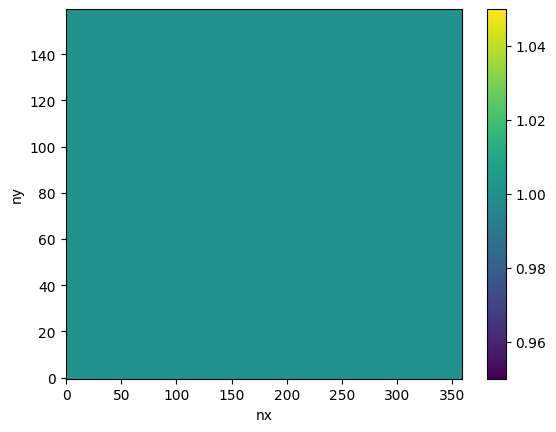

In [5]:
topo.tmask.plot()

### *locate an existing land fraction*

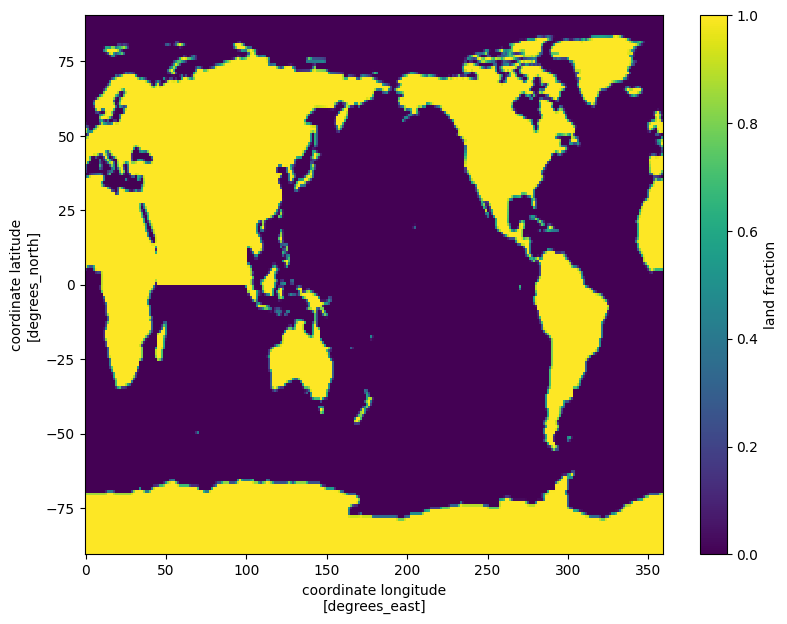

In [6]:
import xarray as xr
ds_land = xr.open_dataset("/glade/work/altuntas/cesm.input/vcg/fill_indianocean.nc")
ds_land.landfrac.plot(size=7)

### *apply the existing land frac -- bilinear (default)*

/glade/work/altuntas/miniconda3/envs/mom6_bathy_env/lib/python3.10/site-packages/xesmf/backend.py:41: UserWarning: Input array is not F_CONTIGUOUS. Will affect performance.
  warnings.warn('Input array is not F_CONTIGUOUS. ' 'Will affect performance.')


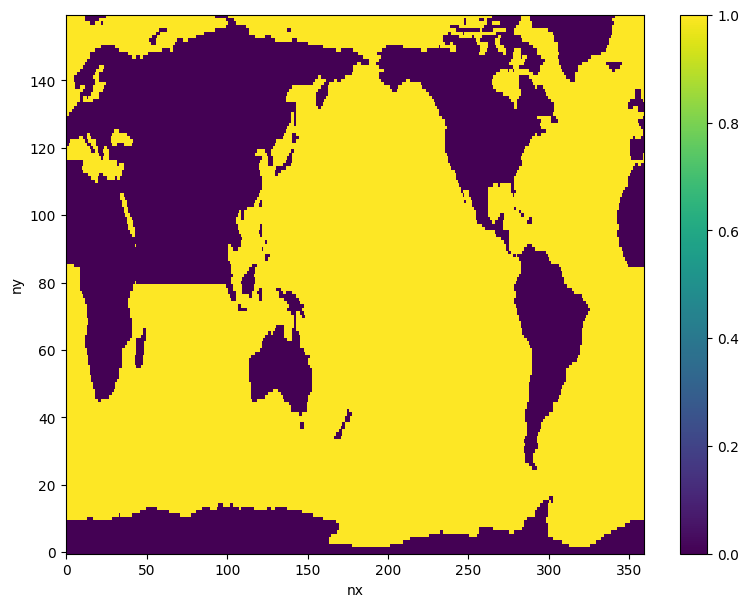

In [7]:
topo.apply_land_frac(
    landfrac_filepath = "/glade/work/altuntas/cesm.input/vcg/fill_indianocean.nc",
    landfrac_name = "landfrac",
    xcoord_name = "lon",
    ycoord_name = "lat"
)

topo.tmask.plot(size=7)

### *Try out a different cutoff fraction (default is 0.5)*

/glade/work/altuntas/miniconda3/envs/mom6_bathy_env/lib/python3.10/site-packages/xesmf/backend.py:41: UserWarning: Input array is not F_CONTIGUOUS. Will affect performance.
  warnings.warn('Input array is not F_CONTIGUOUS. ' 'Will affect performance.')


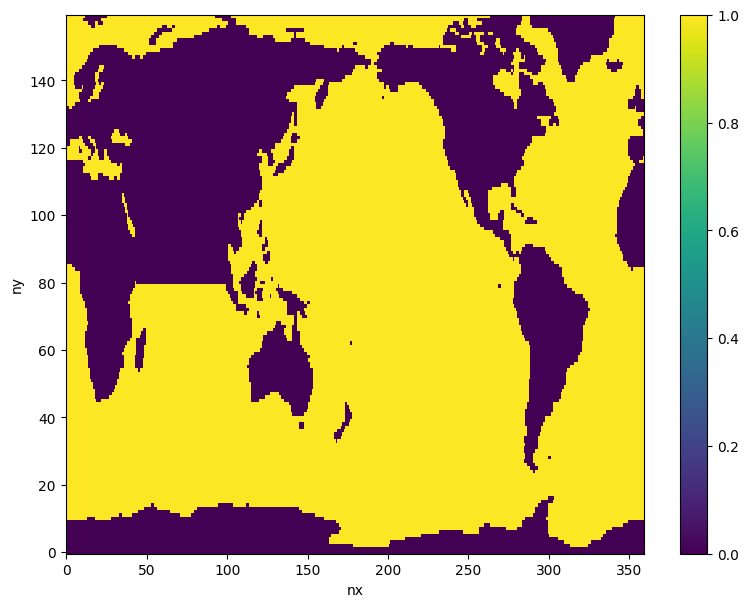

In [8]:
# reset bathymetry
topo.set_flat(D=2000.0)

# re-apply land frac with a different cutoff
topo.apply_land_frac(
    landfrac_filepath = "/glade/work/altuntas/cesm.input/vcg/fill_indianocean.nc",
    landfrac_name = "landfrac",
    xcoord_name = "lon",
    ycoord_name = "lat",
    cutoff_frac = 0.3 ### reduce the cutoff from 0.5 to 0.3
)

topo.tmask.plot(size=7)

## 4. Save the grid and bathymetry files

In [9]:
# MOM6 supergrid file:
grid.write_supergrid("./ocean_hgrid_4.nc")

# MOM6 topography file:
topo.write_topo("./ocean_topog_4.nc")

# CICE grid file:
topo.write_cice_grid("./cice_grid_4.nc")

# ESMF mesh file:
topo.write_esmf_mesh("./ESMF_mesh_4.nc")